# Exploratory Data Analysis (EDA) -  Capital Bike Share (CaBi)

In [ ]:
# 📦 Standard Library
import sys
from pathlib import Path

# 📊 Data Analysis & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🌐 Geospatial Analysis
from geopy.distance import geodesic

# 🛠️ Project-Specific Modules
sys.path.append(str(Path().resolve().parent / "src"))
from paths import RAW_DATA_DIR
from helpers_folium import  load_bikeshare_data
from eda_helpers import dataset_overview, clean_column_names,  missing_values_table, plot_missing_values, numerical_summary,plot_numeric_distributions, remove_outliers_iqr, categorical_summary, plot_categorical_counts, convert_to_datetime, extract_datetime_parts, reduce_memory_usage, find_duplicates, group_summary, feature_cardinality, find_rare_labels

## Data Loading

In [7]:
# load data
bikes = load_bikeshare_data (RAW_DATA_DIR / "CBS_2021-2023_Full.csv")

## Data Wrangling

In [8]:
# overview dataset
dataset_overview(bikes)

Shape: (10693997, 13)

Data Types:
 ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name          category
start_station_id              object
end_station_name            category
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
dtype: object



Missing Values:
 ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

Duplicates: 0


### Memory Usage

In [9]:
# reduces memory usage by converting numeric data types 
reduce_memory_usage(bikes)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025238,38.894600,-77.072304,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917194,-77.025894,38.959999,-77.019997,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912136,-77.038567,38.920872,-77.031693,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879478,-77.114563,38.879478,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931320,-77.028244,38.931992,-77.032959,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693992,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806004,-77.055908,38.804718,-77.043365,member
10693993,BA9E9FDBFAFDE618,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884186,-76.995399,38.890461,-76.988358,member
10693994,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909393,-77.048729,38.896103,-77.049881,casual
10693995,D2DB18DB58BC83D2,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909393,-77.048729,38.909393,-77.048729,casual


### Handling missing / Incomplete data

In [10]:
# table of missing values
missing_values_table(bikes)

,Missing Values,% of Total Values
end_station_id,811282,7.586331
end_station_name,811282,7.586331
start_station_id,742776,6.945729
start_station_name,742776,6.945729
end_lng,16765,0.156770
end_lat,16765,0.156770
start_lng,2,0.000019
start_lat,2,0.000019


In [11]:
docked = bikes[bikes["rideable_type"] == "docked"]
ebike = bikes[bikes["rideable_type"] == "electric_bike"]
classic = bikes[bikes["rideable_type"] == "classic_bike"]

In [12]:
# Understanding null values 

print(f"Null values for docked bikes start station ID: {docked["start_station_id"].isna().sum()}")
print(f"Null values for docked bikes end station ID: {docked["end_station_id"].isna().sum()}")
print(f"Null values for ebikes start station ID: {ebike["start_station_id"].isna().sum()}")
print(f"Null values for ebikes end station ID: {ebike["end_station_id"].isna().sum()}")
print(f"Null values for classic start station ID: {classic["end_station_id"].isna().sum()}")
print(f"Null values for classic end station ID: {classic["start_station_id"].isna().sum()}")

Null values for docked bikes start station ID: 0
Null values for docked bikes end station ID: 0
Null values for ebikes start station ID: 742766
Null values for ebikes end station ID: 786251
Null values for classic start station ID: 19895
Null values for classic end station ID: 10


**Dealing with missing values**

Pedal bikes must be checked out and returned to a station. E-bikes may be docked at fixed stations or parked anywhere within the defined service area; however, users incur an additional fee when an e-bike is not parked at a station.

The null values in  start and end stations refer to ebikes that are not docked (left on the street). Thus, they are not linked to a station, but they still have start and end latitude and longitude. For that reason, we are not removing or imputing them. 

### Formatting

In [13]:
bikes["start_station_id"]=bikes["start_station_id"].str.replace(".0","")
bikes["end_station_id"]=bikes["end_station_id"].str.replace(".0","")

# EDA

In [14]:
cabi_df= bikes.copy()

### Numeric summary

In [15]:
# summary
numerical_summary(cabi_df)

,count,mean,min,25%,50%,75%,max,std,skew,kurtosis
started_at,10693997,2022-09-13 17:52:21.865432320,2021-01-01 00:08:33,2021-12-16 10:45:23,2022-09-22 08:29:17,2023-06-18 21:42:53,2023-12-31 23:59:38,NaN,NaN,NaN
ended_at,10693997,2022-09-13 18:15:16.333648896,2021-01-01 00:21:00,2021-12-16 11:00:56,2022-09-22 08:44:49,2023-06-18 22:08:16,2024-01-02 00:41:36,NaN,NaN,NaN
start_lat,10693995.0,38.903255,38.759998,38.890537,38.90276,38.914753,39.139999,0.026842,0.560175,8.788686
start_lng,10693995.0,-77.031532,-77.400002,-77.044609,-77.031616,-77.013664,-76.82,0.033462,-2.774713,22.047384
end_lat,10677232.0,38.902252,0.0,38.890495,38.902313,38.912647,39.189999,0.050493,-556.727112,428988.843750
end_lng,10677232.0,-77.031502,-77.559998,-77.044662,-77.031502,-77.01281,0.0,0.091278,731.671875,617588.937500


### Working with dates and times

In [16]:
cabi_df["start_time"]=cabi_df["started_at"].dt.time
cabi_df["end_time"]=cabi_df["ended_at"].dt.time
cabi_df["start_hour"]=cabi_df["started_at"].dt.hour
cabi_df["end_hour"]=cabi_df["ended_at"].dt.hour
cabi_df['year'] = cabi_df['started_at'].dt.year
cabi_df['month'] = cabi_df['started_at'].dt.month
cabi_df['day'] = cabi_df['started_at'].dt.day
cabi_df['dow'] = cabi_df['started_at'].dt.dayofweek
cabi_df['weekend'] = np.where(cabi_df['dow'].isin([5, 6]), 1, 0)



### Categorical Features

In [17]:
# # categorical summary
# def categorical_summary(df):
#     cat_cols = df.select_dtypes(["object","category"])
#     for col in cat_cols.columns:
#         print(f"Number of unique values in {col} column: ", cat_cols[col].nunique())

# categorical_summary(cabi_df)

In [18]:
categorical_summary(cabi_df)

Number of unique values in ride_id column:  10693997
Number of unique values in rideable_type column:  3
Number of unique values in start_station_name column:  860
Number of unique values in start_station_id column:  774
Number of unique values in end_station_name column:  865
Number of unique values in end_station_id column:  778
Number of unique values in member_casual column:  2
Number of unique values in start_time column:  86383
Number of unique values in end_time column:  86388


### Time of the day categories

In [19]:
# create categories for morning, afternoon, evening, night

cabi_df['time_of_day'] = cabi_df['start_hour'].apply(lambda value: 'morning' if value in (4,5,6,7,8,9,10,11)
                                                        else 'afternoon' if value in (12,13,14,15,16)
                                                        else 'evening' if value in (17,18,19,20,21) 
                                                        else 'night')

cabi_df['time_of_day'] = pd.Categorical(cabi_df['time_of_day'],
categories=["morning","afternoon","evening","night"])



In [20]:
# plt.boxplot(bikes3["trip_duration_minutes"])
# sns.catplot(data=bikes3,kind="box", y="trip_duration_minutes").set(ylim=(0,100))

### Trip duration category

In [21]:
# create trip duration column
cabi_df["trip_duration_minutes"] = np.round((cabi_df["ended_at"] - cabi_df["started_at"]) / np.timedelta64(1,"m"),0)

# check avg and mode bike rides
print(f"trip duration mode: {list(cabi_df["trip_duration_minutes"].mode())}")
print(f"trip duration avg: {cabi_df["trip_duration_minutes"].mean()}")

trip duration mode: [6.0]
trip duration avg: 22.906806220349605


<Axes: xlabel='trip_duration_minutes'>

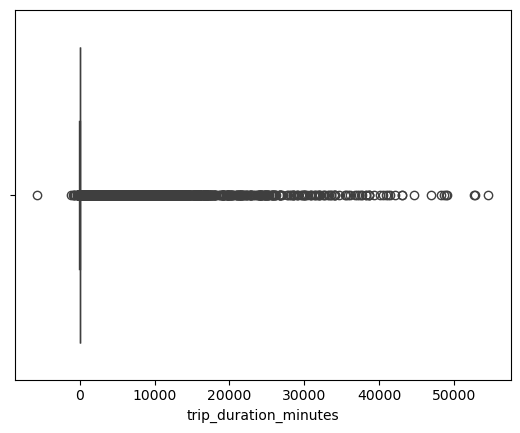

In [22]:
# box plot for trip duration

sns.boxplot(x=cabi_df["trip_duration_minutes"])

In [23]:
# Create duration labels
duration_labels = ["short_duration", "medium_duration", "long_duration", "extra_long_duration"]

#2 Create duration ranges list
duration_ranges = [0, 15, 30, 45, np.inf]

#3 Create trip_type
cabi_df["trip_type"] = pd.cut(cabi_df["trip_duration_minutes"],
                                  bins= duration_ranges,
                                  labels=duration_labels)

cabi_df[["trip_type", "trip_duration_minutes"]]

cabi_df["trip_type"].value_counts()

trip_type
short_duration         6767279
medium_duration        2425111
extra_long_duration     729120
long_duration           665323
Name: count, dtype: int64

In [24]:
# make trip_type categorical and assign it an order
cabi_df['trip_type'] = pd.Categorical(cabi_df['trip_type'],
categories=['short_duration', 'medium_duration', 'long_duration', "extra_long_duration"])

<Axes: xlabel='trip_type', ylabel='count'>

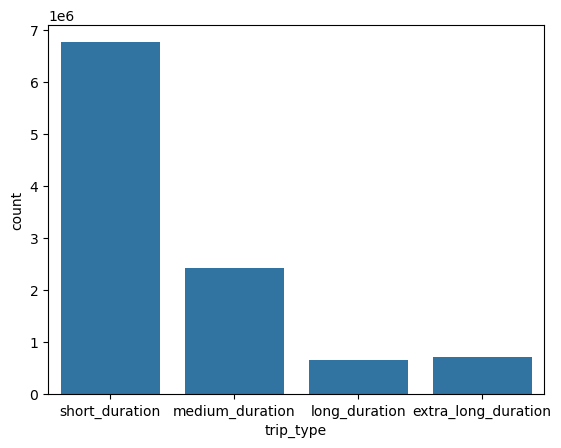

In [25]:
# plot the trip_type distribution
sns.countplot(data=cabi_df, x="trip_type")

### Filtering outliers for trip duration

In [26]:
# Compute the first and third quantiles and IQR 
q1 = np.quantile(cabi_df["trip_duration_minutes"], 0.25)
q3 = np.quantile(cabi_df["trip_duration_minutes"], 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

bikes_filtered = cabi_df[(cabi_df["trip_duration_minutes"] > lower) & (cabi_df["trip_duration_minutes"] < upper)]

In [27]:
# 99 percentile
pctil_99 = q3 = np.quantile(cabi_df["trip_duration_minutes"], 0.97)
pctil_99

np.float64(76.0)

In [28]:
bikes_filtered99= cabi_df[(cabi_df["trip_duration_minutes"] > lower) & (cabi_df["trip_duration_minutes"] < pctil_99)]

In [29]:
# printing results of IQR and 99 percentile filtering
print(f"number of rows before iqr filter: {len(cabi_df)}")
print(f'number of rows after iqr filter: {len(bikes_filtered)}')
print(f'number of rows after pctil99 filter: {len(bikes_filtered99)}')
print(f'difference between iqr and pctil 99 : {len(bikes_filtered)-len(bikes_filtered99)}')
print(q1)

number of rows before iqr filter: 10693997
number of rows after iqr filter: 9770936
number of rows after pctil99 filter: 10366220
difference between iqr and pctil 99 : -595284
7.0


In [30]:
# percentage of data outside the whiskers (outliers)
outliers = (cabi_df["trip_duration_minutes"] < lower) | (cabi_df["trip_duration_minutes"] > upper)
outlier_percentage = np.sum(outliers) / len(cabi_df) * 100
print(f"Percentage of data outside the whiskers (outliers): {outlier_percentage:.2f}%")

Percentage of data outside the whiskers (outliers): 8.63%


For a perfectly normal distribution:

About 0.7% of the data points are expected to lie outside the whiskers.
This is because approximately 99.3% of data in a normal distribution falls within 
±2.698𝜎(where 𝜎 is the standard deviation), which corresponds to the range covered by the whiskers.

For other distributions:
The percentage of outliers can vary widely depending on the shape and spread of the distribution. Skewed, heavy-tailed, or multimodal distributions can result in more data points lying outside the whiskers.

In [31]:
# max and min trip duration for filtered data
print(f"Max trip duration : {bikes_filtered["trip_duration_minutes"].max()}")
print(f"Min trip duration : {bikes_filtered["trip_duration_minutes"].min()}")

Max trip duration : 39.0
Min trip duration : -12.0


In [32]:
# trip duration quantiles
print(cabi_df["trip_duration_minutes"].quantile(0.25))
print(cabi_df["trip_duration_minutes"].quantile(0.50))
print(cabi_df["trip_duration_minutes"].quantile(0.75))


7.0
11.0
20.0


## Hour with highest number of trips

In [33]:
# plot the trip_type distribution by time of day
start_time_value_counts = cabi_df["start_hour"].value_counts()
peak_time = start_time_value_counts.idxmax()
print(f"peak time : {peak_time} hs")

peak time : 17 hs


([<matplotlib.axis.XTick at 0x205237410>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22')])

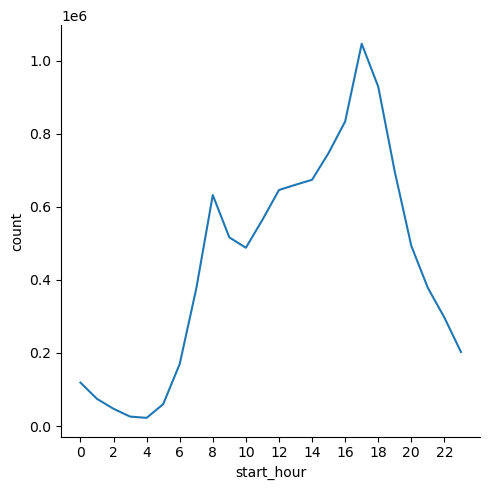

In [34]:
sns.relplot(kind="line", data= start_time_value_counts)
plt.xticks(np.arange(0, 24, 2))

In [35]:
# average rides per hour
avg_rides_per_hour = cabi_df.groupby("start_hour")["ride_id"].mean()

TypeError: agg function failed [how->mean,dtype->object]

([<matplotlib.axis.XTick at 0x1d78c0c20>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22')])

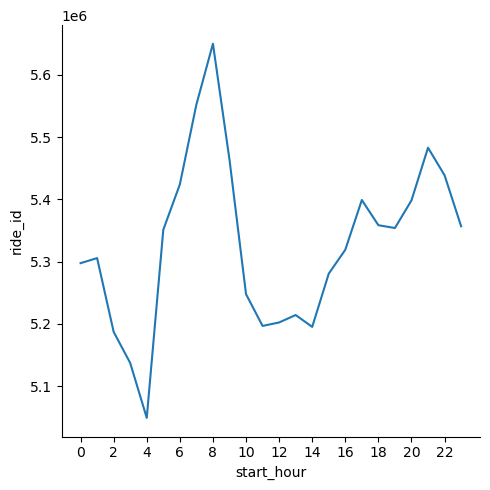

In [ ]:
# plot average rides per hour
sns.relplot(kind="line", data= avg_rides_per_hour )
plt.xticks(np.arange(0, 24, 2))

In [ ]:
# defining weekdays and weekends
week_days = cabi_df[cabi_df["dow"].isin([0,1,2,3,4])]
weekends = cabi_df[cabi_df["dow"].isin([5,6])]

([<matplotlib.axis.XTick at 0x1d78bd460>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22')])

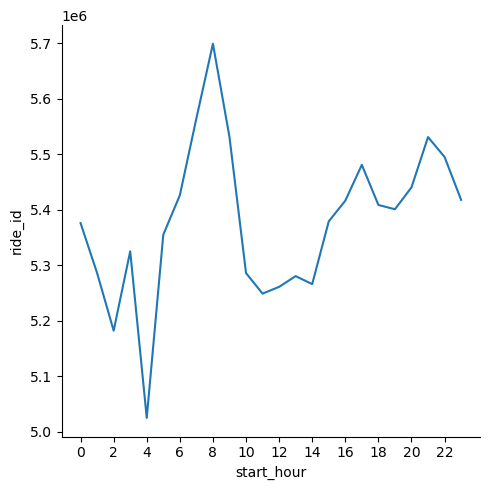

In [ ]:
# avg rides weekdays
avg_rides_per_hour_week_days = week_days.groupby("start_hour")["ride_id"].mean()
sns.relplot(kind="line", data= avg_rides_per_hour_week_days )
plt.xticks(np.arange(0, 24, 2))

In [ ]:
# avg rides weekends
avg_rides_per_hour_weekends = weekends.groupby("start_hour")["ride_id"].mean()
sns.relplot(kind="line", data= avg_rides_per_hour_weekends)
plt.xticks(np.arange(0, 24, 2))

([<matplotlib.axis.XTick at 0x1d7b09130>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22')])

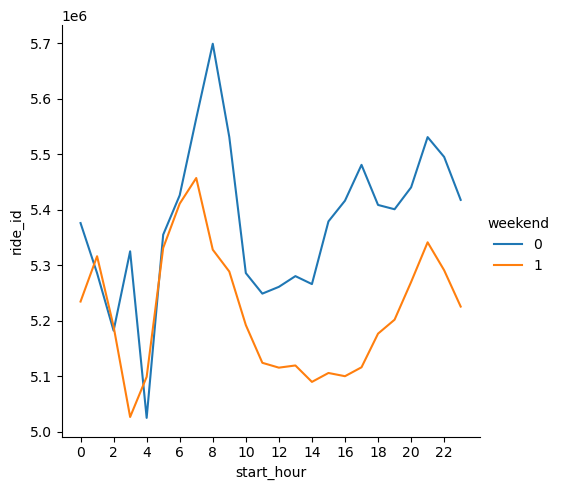

In [ ]:
# comparing weekdays and weekends rides per hour
avg_rides_per_hour = cabi_df.groupby(["start_hour","weekend"], as_index=False)["ride_id"].mean()

g= sns.relplot(kind="line", data= avg_rides_per_hour, x="start_hour",y="ride_id", hue = "weekend")
# plt.legend(['week_day', 'weekends'])
plt.xticks(np.arange(0, 24, 2))
# g.legend.remove()
# g.add_legend(title="weekends", label_order=["yes","no"])
# # g.legend.set_title("wakaka")
# # g.legend.set_label("yes")


## Daily Trends

In [ ]:
# what types of trip are most popular in the different times of day?
time_of_day_trip_type = cabi_df.groupby("time_of_day",observed=False)["trip_type"].value_counts()
time_of_day_trip_type

time_of_day  trip_type          
morning      short_duration         1908460
             medium_duration         590845
             extra_long_duration     157936
             long_duration           142269
afternoon    short_duration         2074869
             medium_duration         845310
             extra_long_duration     328781
             long_duration           276817
evening      short_duration         2265592
             medium_duration         823980
             long_duration           209223
             extra_long_duration     207602
night        short_duration          518358
             medium_duration         164976
             long_duration            37014
             extra_long_duration      34801
Name: count, dtype: int64

In [ ]:
# preferred trip type in each time of day
unique_times_of_day = cabi_df["time_of_day"].unique()
time_of_day_trip_type["afternoon"].idxmax()

for time in unique_times_of_day:
    print(f"preferred trip type in {time}: {time_of_day_trip_type[time].idxmax()} ")

preferred trip type in night: short_duration 
preferred trip type in morning: short_duration 
preferred trip type in afternoon: short_duration 
preferred trip type in evening: short_duration 


## Trip duration count per rideable type

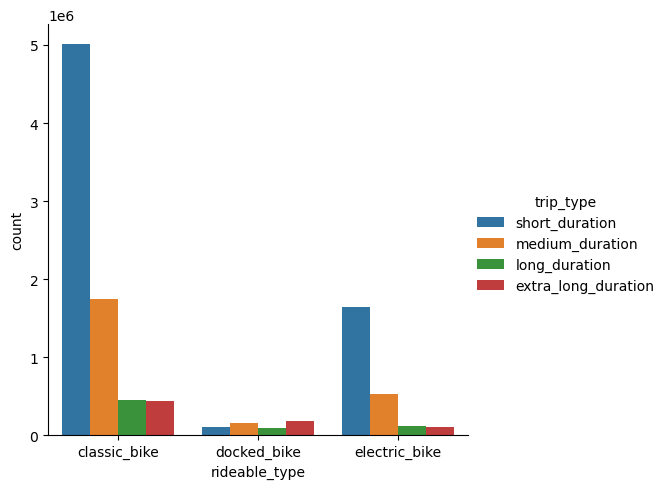

In [ ]:
# plot the distribution of rideable types by trip type
sns.catplot(data=cabi_df, kind="count", x = "rideable_type", hue= "trip_type")

## Busiest stations

In [ ]:
# which stations are busiest at the different times of day?

morning_time = cabi_df[cabi_df["time_of_day"]=="morning"]
morning_time_value_counts=morning_time["start_station_id"].value_counts()
busiest_station_morning= morning_time_value_counts.idxmax()
print(f"busiest morning station: {busiest_station_morning}")

afternoon_time = cabi_df[cabi_df["time_of_day"]=="afternoon"]
afternoon_time_value_counts=afternoon_time["start_station_id"].value_counts()
busiest_station_afternoon= afternoon_time_value_counts.idxmax()
print(f"busiest afternoon station: {busiest_station_afternoon}")

evening_time = cabi_df[cabi_df["time_of_day"]=="evening"]
evening_time_value_counts=evening_time["start_station_id"].value_counts()
busiest_station_evening= evening_time_value_counts.idxmax()
print(f"busiest evening station: {busiest_station_evening}")

night_time = cabi_df[cabi_df["time_of_day"]=="night"]
night_time_value_counts=night_time["start_station_id"].value_counts()
busiest_station_night= night_time_value_counts.idxmax()
print(f"busiest night station: {busiest_station_night}")

busiest morning station: 31229
busiest afternoon station: 31288
busiest evening station: 31623
busiest night station: 31114


In [ ]:
# Top 50 busiest stations
top_stations = cabi_df["start_station_id"].value_counts()
top50_stations_list = top_stations.head(50).index
top50_stations_list= list(top50_stations_list)


In [ ]:
# Check when is each station the busiest
top50_stations = cabi_df[cabi_df["start_station_id"].isin(top50_stations_list)]
top50_value_counts = top50_stations.groupby("start_station_id")["time_of_day"].value_counts(sort=False)
top50_value_counts.head(50)

for station in top50_stations_list:
    print(f"busiest time of day in Station nr {station}: {top50_value_counts[station].idxmax()} ")


busiest time of day in Station nr 31229: evening 
busiest time of day in Station nr 31623: evening 
busiest time of day in Station nr 31201: evening 
busiest time of day in Station nr 31258: afternoon 
busiest time of day in Station nr 31247: afternoon 
busiest time of day in Station nr 31603: evening 
busiest time of day in Station nr 31288: afternoon 
busiest time of day in Station nr 31600: evening 
busiest time of day in Station nr 31101: morning 
busiest time of day in Station nr 31248: afternoon 
busiest time of day in Station nr 31613: afternoon 
busiest time of day in Station nr 31289: afternoon 
busiest time of day in Station nr 31200: afternoon 
busiest time of day in Station nr 31281: evening 
busiest time of day in Station nr 31202: evening 
busiest time of day in Station nr 31266: morning 
busiest time of day in Station nr 31627: evening 
busiest time of day in Station nr 31214: evening 
busiest time of day in Station nr 31125: evening 
busiest time of day in Station nr 31

# Calculate trip distance

In [ ]:
# using a sample to reduce computation time
bikes_sample = cabi_df.sample(n=5)

Here's the problem:

Input as entire columns, not individual rows:

bikes_sample['start_lat'] and bikes_sample['start_lng'] are entire columns of the DataFrame, not single values.
The distance.distance() function expects tuples of coordinates, e.g., (latitude, longitude), where each coordinate is a single value. However, you're passing an entire column for each coordinate, which results in invalid input.
Broadcasting issue:

distance.distance(start_coords1, end_coords1) cannot calculate distances for multiple points simultaneously unless explicitly vectorized. This function expects two tuples for a single pair of coordinates, not arrays or lists.
Correct Approach
To fix this, you need to calculate the distance row-by-row.

In [ ]:
def calculate_distance(row):
    start_coords = (row['start_lat'], row['start_lng'])
    end_coords = (row['end_lat'], row['end_lng'])
    return geodesic(start_coords, end_coords).kilometers

bikes_sample['distance_km'] = bikes_sample.apply(calculate_distance, axis=1)


In [ ]:
bikes_sample["distance_km"] = round(bikes_sample['distance_km'],2)

In [ ]:
bikes_sample

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_hour,year,month,day,dow,weekend,time_of_day,trip_duration_minutes,trip_type,distance_km
9328104,9328105,electric_bike,2023-09-14 18:53:05,2023-09-14 19:22:30,Eastern Market / 7th & North Carolina Ave SE,31610,Deanwood Rec Center,31711,38.886994,-76.996787,...,19,2023,9,14,3,0,evening,29.0,medium_duration,6.02
1121991,1121992,docked_bike,2021-07-03 17:34:56,2021-07-03 18:00:21,15th St & Constitution Ave NW,31321,4th St & Madison Dr NW,31288,38.892244,-77.033234,...,18,2021,7,3,5,1,evening,25.0,medium_duration,1.40
9328799,9328800,electric_bike,2023-09-14 19:20:23,2023-09-14 19:23:30,NaN,NaN,NaN,NaN,38.900000,-76.980000,...,19,2023,9,14,3,0,evening,3.0,short_duration,0.00
5914091,5914092,classic_bike,2022-11-11 16:40:46,2022-11-11 17:29:07,18th & New Hampshire Ave NW,31324,11th & C St SE,31659,38.911268,-77.041829,...,17,2022,11,11,4,0,afternoon,48.0,extra_long_duration,5.20
9972570,9972571,classic_bike,2023-10-26 20:35:50,2023-10-26 20:42:34,Court House Metro / 15th St & N Uhle St,31089,12th St N & N Pierce St,31051,38.890612,-77.084801,...,20,2023,10,26,3,0,evening,7.0,short_duration,0.84


In [ ]:
# dropping rows with missing coordinates to keep only rows that correspond to a CaBi Station (not bikes dropped off in the street)
bikes_dropped = cabi_df.dropna(subset=["start_lat","start_lng", "end_lat","end_lng"])

## Sampling
1000 rows per month

In [ ]:
samples = []

# Loop over years and months to sample 1,000 rows for each month
for year in range(2021, 2024):  # Covering 2021, 2022, and 2023
    for month in range(1, 13):  # Months from 1 to 12
        # Filter for the specific year and month
        filtered_data = bikes_dropped[(bikes_dropped["year"] == year) & (bikes_dropped["month"] == month)]
        
        # Sample 1,000 rows if there are enough rows available
        if len(filtered_data) >= 1000:
            sample = filtered_data.sample(n=1000, random_state=42)
        else:  # If less than 1,000 rows, take all available rows
            sample = filtered_data
            
        samples.append(sample)

# Combine all the samples into a single DataFrame
bikes_monthly_sample = pd.concat(samples, ignore_index=True)



The ideal sample size depends on several factors, including the variability of your data, the analyses you plan to perform, and the level of precision you require.
Statistical Guidelines
Statistical sampling often considers these factors:

Confidence Level: How confident do you want to be that your sample represents the population? Common values: 95% or 99%.
Margin of Error: How much error are you willing to tolerate in your estimates? Typical values: 5% or 1%.
Population Variability: How diverse is the dataset? Higher variability requires a larger sample.
For a population of 10 million and a 95% confidence level with a 5% margin of error, you need about 385 samples for statistical inferences. However, you're taking 36,000 samples, which is far larger than statistically required, so it should be representative.

If your system can handle a slightly larger dataset, you might consider sampling 50,000-100,000 rows (~0.5%-1% of the population) to reduce the risk of missing rare patterns.



In [ ]:
# calculate trip distances for the monthly sample
def calculate_distance(row):
    start_coords = (row['start_lat'], row['start_lng'])
    end_coords = (row['end_lat'], row['end_lng'])
    return geodesic(start_coords, end_coords).kilometers

bikes_monthly_sample['distance_km'] = bikes_monthly_sample.apply(calculate_distance, axis=1)
bikes_monthly_sample["distance_km"] = round(bikes_monthly_sample['distance_km'],2)

In [ ]:
bikes_monthly_sample.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_hour,year,month,day,dow,weekend,time_of_day,trip_duration_minutes,trip_type,distance_km
0,21505,classic_bike,2021-01-08 11:08:35,2021-01-08 11:13:55,Thomas Circle,31241,16th & R St NW,31282,38.905900,-77.032500,...,11,2021,1,8,4,0,morning,5.0,short_duration,0.82
1,57481,classic_bike,2021-01-17 19:26:09,2021-01-17 19:28:26,1st & H St NW,31638,4th St & K St NW,31642,38.900358,-77.012108,...,19,2021,1,17,6,1,evening,2.0,short_duration,0.41
2,7395,classic_bike,2021-01-03 12:51:51,2021-01-03 13:34:11,11th & Girard St NW,31126,13th & U St NW,31132,38.925636,-77.027112,...,13,2021,1,3,6,1,afternoon,42.0,long_duration,0.99
3,33306,electric_bike,2021-01-11 15:17:56,2021-01-11 15:23:47,Wilson Blvd & N Illinois St,31902,Ballston Metro / Stuart St & 9th St N,31037,38.876520,-77.127085,...,15,2021,1,11,0,0,afternoon,6.0,short_duration,1.41
4,70049,electric_bike,2021-01-21 18:11:01,2021-01-21 18:23:34,NaN,NaN,Cordell & Norfolk Ave,32008,38.960000,-77.080000,...,18,2021,1,21,3,0,evening,13.0,short_duration,3.63


In [ ]:
# describe the distance_km column in the monthly sample
bikes_monthly_sample["distance_km"].describe()

count    36000.000000
mean         1.860201
std          1.493791
min          0.000000
25%          0.880000
50%          1.530000
75%          2.490000
max         20.650000
Name: distance_km, dtype: float64

In [ ]:
# describe trip duration in the monthly sample
bikes_monthly_sample["trip_duration_minutes"].describe()

count    36000.000000
mean        21.461500
std        222.886506
min          0.000000
25%          7.000000
50%         11.000000
75%         20.000000
max      37284.000000
Name: trip_duration_minutes, dtype: float64

In [ ]:
# identify rows with zero trip distance 
zero_km = bikes_monthly_sample[bikes_monthly_sample["distance_km"] == 0]



In [ ]:
zero_km["trip_type"].value_counts()

trip_type
short_duration         880
extra_long_duration    584
medium_duration        326
long_duration          235
Name: count, dtype: int64

In [ ]:
zero_to_one = bikes_monthly_sample[(bikes_monthly_sample["distance_km"] >= 0.0) & (bikes_monthly_sample["distance_km"] <= 1.0)]

In [ ]:
bikes_monthly_sample["distance_km"].mode()

0    0.0
Name: distance_km, dtype: float64

In [ ]:
bikes_monthly_sample["trip_duration_minutes"].mode()

0    6.0
Name: trip_duration_minutes, dtype: float64

[(0.0, 100.0)]

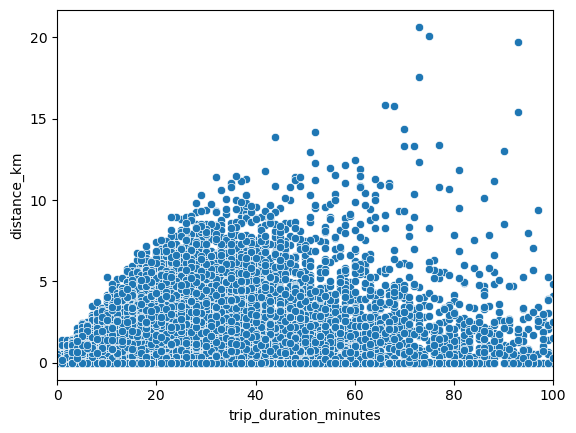

In [ ]:
sns.scatterplot(data=bikes_monthly_sample, x="trip_duration_minutes", y="distance_km").set(xlim=(0,100))

**Interpretations**
- To ride certain distance you need a certain amount of time, but the time alone doesn't account for the distance was covered
- The distance is from point A to final destination point b, but there could be many stops in between, or do a whole loop and come back to start station, so final distance = 0, but time_duration could be much larger. 

([<matplotlib.axis.XTick at 0x203f35a30>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

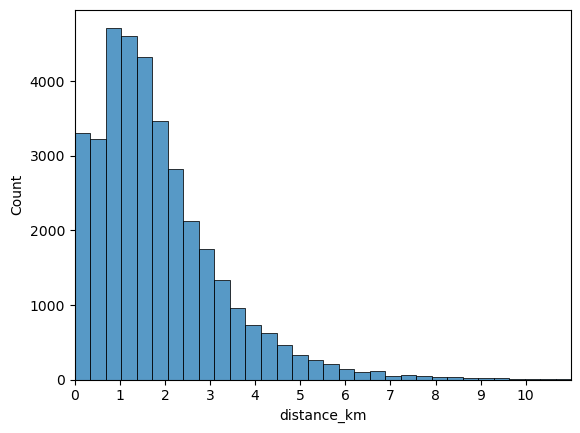

In [ ]:
# plotting distribution of trip distances
sns.histplot(data=bikes_monthly_sample, x="distance_km",bins=60).set(xlim=(0,11))
plt.xticks(np.arange(0, 11, 1))

#NOTE - the avg distance can gives us an idea of how close should stations be located


what's the distance between stations in concentrated and peripheral areas? 


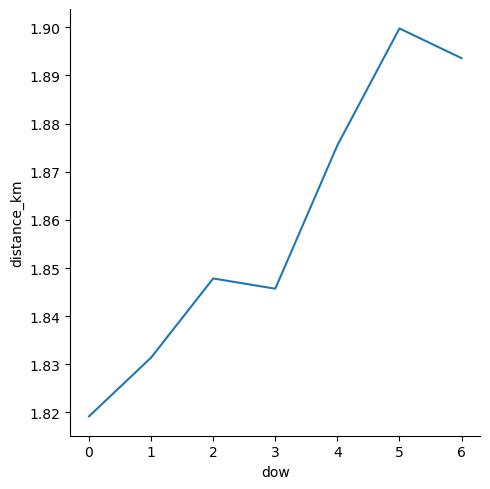

In [ ]:
# which days do people ride longer distances?
avg_rides_per_hour = bikes_monthly_sample.groupby("dow", as_index=False)["distance_km"].mean()

avg_rides_per_hour
g= sns.relplot(kind="line", data= avg_rides_per_hour, x="dow",y="distance_km")
# # plt.legend(['week_day', 'weekends'])
# plt.xticks(np.arange(0, 24, 2))

# Sampling to reduce size

In [ ]:
# 108.000 rows sample (3000 per month)
samples = []

# Loop over years and months to sample 1,000 rows for each month
for year in range(2021, 2024):  # Covering 2021, 2022, and 2023
    for month in range(1, 13):  # Months from 1 to 12
        # Filter for the specific year and month
        filtered_data = bikes_dropped[(bikes_dropped["year"] == year) & (bikes_dropped["month"] == month)]
        
        # Sample 1,000 rows if there are enough rows available
        if len(filtered_data) >= 3000:
            sample = filtered_data.sample(n=3000, random_state=42)
        else:  # If less than 3,000 rows, take all available rows
            sample = filtered_data
            
        samples.append(sample)

# Combine all the samples into a single DataFrame
bikes_monthly_sample_3000 = pd.concat(samples, ignore_index=True)

In [ ]:
# csv to work with mapping

bikes_monthly_sample_3000.to_csv("bikes_sample.csv", index=False)